### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [2]:
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'], axis=1, inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

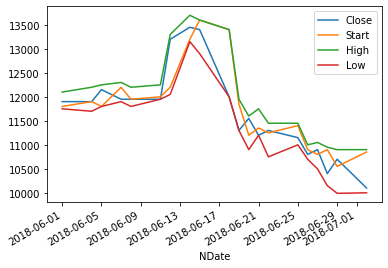

In [3]:
df1.plot()

<AxesSubplot:xlabel='NDate'>

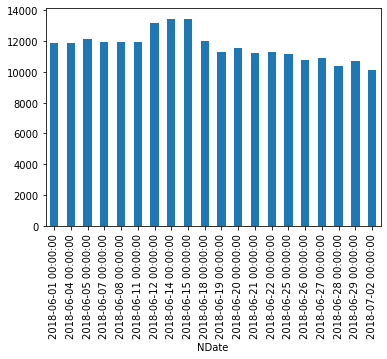

In [4]:
# 막대 그래프
df1.Close[::-1].plot(kind='bar')

<AxesSubplot:xlabel='NDate'>

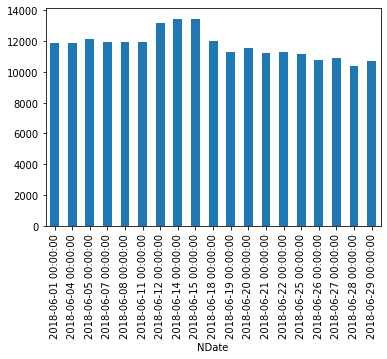

In [5]:
# Q. 6월만을 추출하여 Close 컬럼으로 일별 막대 그래프를 표현하세요.
# df1.Close.loc['2018-06'][::-1].plot(kind='bar')
df1.loc['2018-06','Close'][::-1].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

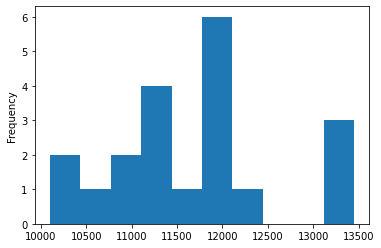

In [6]:
df1.Close.plot(kind='hist', bins=10)

### 과제(7/6-3)

- df에서 Volume 컬럼의 분포를 탐색하는 히스토그램을 표현하세요.

<AxesSubplot:xlabel='Close', ylabel='Volume'>

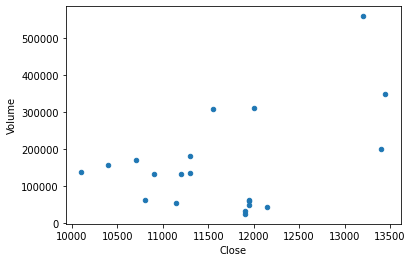

In [7]:
df.plot(x='Close', y='Volume', kind='scatter'  )

In [8]:
df1.corr()

,Close,Start,High,Low
Close,1.000000,0.856181,0.941201,0.946297
Start,0.856181,1.000000,0.961009,0.921467
High,0.941201,0.961009,1.000000,0.945487
Low,0.946297,0.921467,0.945487,1.000000


In [9]:
df1.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

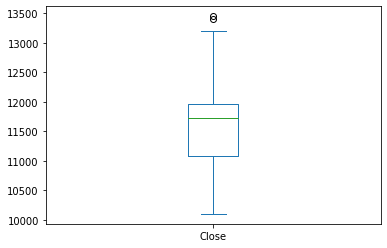

In [10]:
df1.Close.plot(kind='box')

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값


In [11]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [14]:
Q3+IQR*1.5

13275.0

In [13]:
# 이상치
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df.Close <= (Q1 - IQR*1.5)) | (df.Close >= (Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


### 과제(7/7-1)

Start 컬럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.

In [15]:
%pwd

'C:\\cakd7\\m2_분석라이브러리활용\\visualization'

In [16]:
import pandas as pd
df_auto = pd.read_excel('../pandas/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 과제(7/7-2)

- mpg 컬럼에 대하여 box plot으로 시각화한 후 이상치 확인 및 그 값을 구하세요.
- fish_multi에 대하여 box plot으로 시각화한 후 이상치 확인 및 그 값을 구하세요.

In [17]:
fish_multi = pd.read_csv('dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='species', ylabel='length'>

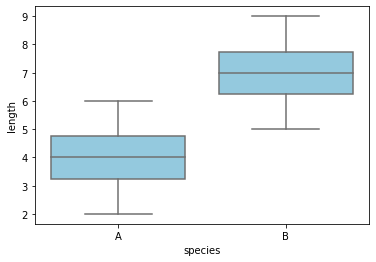

In [18]:
import seaborn as sns
sns.boxplot(x='species',y='length', data=fish_multi, color='skyblue')

In [19]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [20]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2

<AxesSubplot:ylabel='Frequency'>

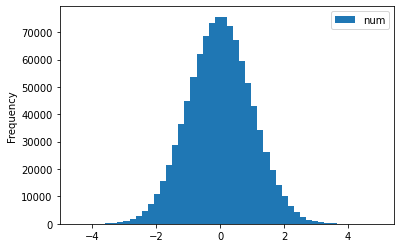

In [24]:
# 평균 0, 표준편차 1인 표준정규분포 난수 10000개로 데이터프레임을 생성(컬럼명 'Num')
df = pd.DataFrame(np.random.randn(1000000), columns = ['num'])
df.plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

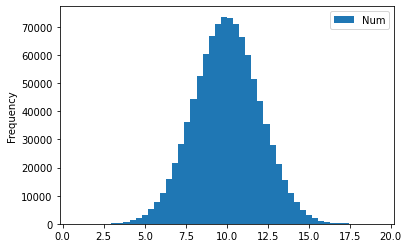

In [27]:
# 평균 10, 표준편차 2, 샘플 10000
from scipy import stats
import numpy as np

np.random.seed(1)
sample1 = stats.norm.rvs(loc=10,scale=2,size=1000000)
df1 = pd.DataFrame(sample1, columns=['Num'])
df1.plot(kind='hist',bins=50)

In [59]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [62]:
plt.style.use('default')

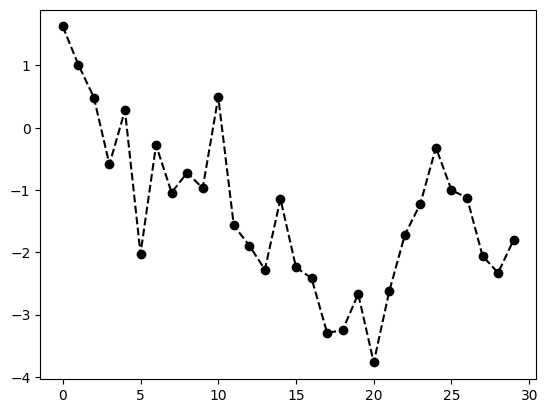

In [63]:
import matplotlib.pyplot as plt
from numpy.random import randn
np.random.seed(1)
plt.plot(randn(30).cumsum(), linestyle='dashed', color='k', marker='o')

In [30]:
data = np.random.randn(1000)
print(data[:10])
cdata = data.cumsum()
cdata[:10]

[-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416]


array([-0.69166075, -1.08841428, -1.77558698, -2.62079262, -3.29203875,
       -3.30470335, -4.4220137 , -4.187598  , -2.52779582, -1.78575166])

Text(0.5, 0, 'Stages')

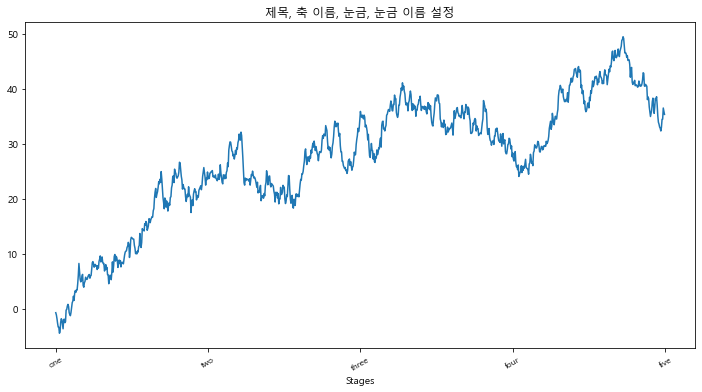

In [40]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc

font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')

ax.set_title('제목, 축 이름, 눈금, 눈금 이름 설정')
ax.set_xlabel('Stages')

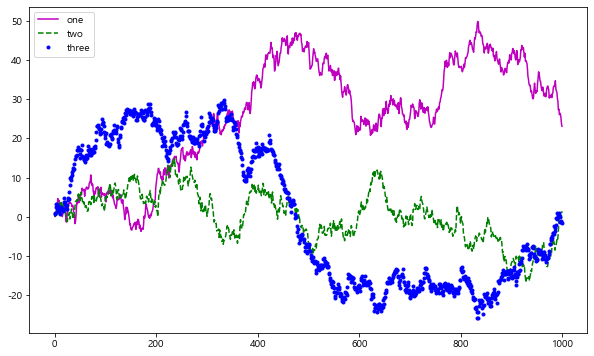

In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'm', label='one')
ax.plot(randn(1000).cumsum(), 'g--', label='two')
ax.plot(randn(1000).cumsum(), 'b.', label='three')

plt.legend(loc='best')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

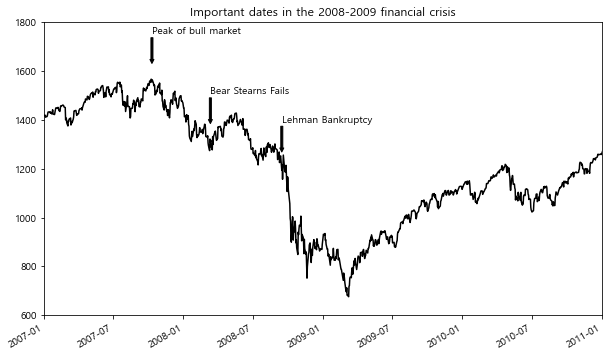

In [43]:
# 주석과 글자는 text, arrow, annotate 함수를 이용하여 추가
from datetime import datetime

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('dataset/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')


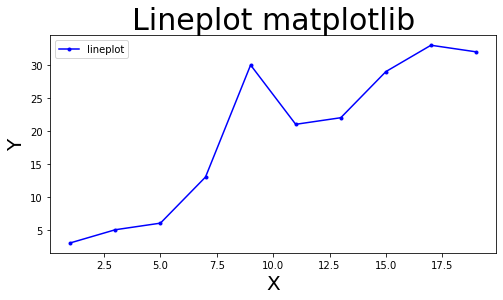

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(8,4))
plt.plot(x,y, color='blue', marker='o', markersize=3)
plt.title('Lineplot matplotlib', size=30)
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
plt.legend(labels=['lineplot'])

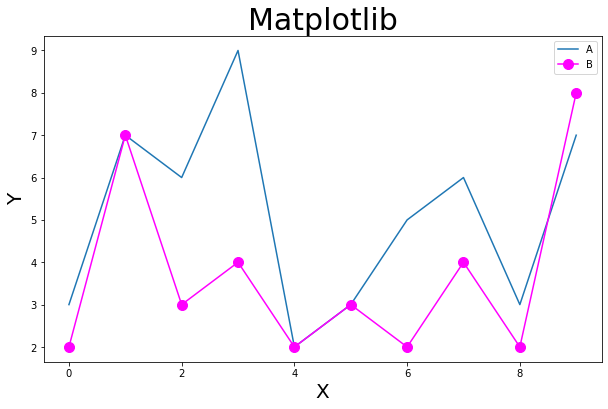

In [4]:
np.random.seed(10)
x = np.arange(10)
y1 = np.random.randint(2,10,size=10)
y2 = np.random.randint(2,10,size=10)
plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2, color='magenta', marker='o', markersize=10)
plt.title('Matplotlib', size=30)
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
plt.legend(labels=['A','B'])

Text(0.5, 1.0, 'Bar Plot')

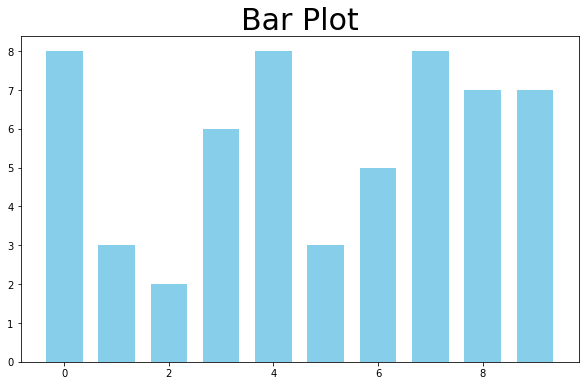

In [6]:
# bar plot (수직 막대)

y = np.random.randint(2,10,size=10)
x = range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.7,color='skyblue')
plt.title('Bar Plot',size=30)

<AxesSubplot:>

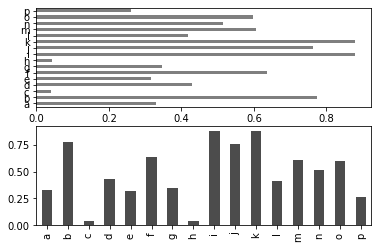

In [11]:
# barh (수평막대)
import pandas as pd
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
# print(data)

data.plot.bar(ax=axes[1], color='k', alpha=0.7)
data.plot.barh(ax=axes[0], color='k', alpha=0.5)

              A         B         C         D
one    0.565126  0.589348  0.198101  0.436118
two    0.295904  0.037558  0.030685  0.453105
three  0.744864  0.557295  0.385114  0.168073
four   0.838261  0.599052  0.782715  0.848509
five   0.603163  0.781061  0.615737  0.021165
six    0.750465  0.176042  0.458514  0.513123


<AxesSubplot:>

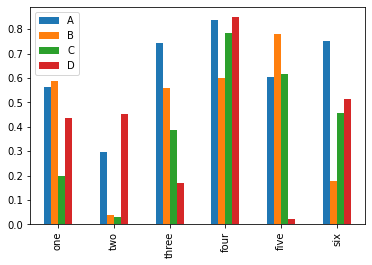

In [16]:
# 각 로우의 값을 묶어서 그룹별 막대그래프로 표현
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one','two','three','four','five','six'],
                 columns = ['A','B','C','D'])

print(df)
df.plot.bar()

<AxesSubplot:>

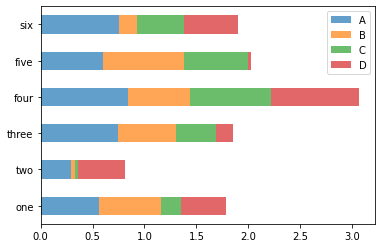

In [18]:
# 누적막대그래프
df.plot.barh(stacked=True, alpha=0.7)

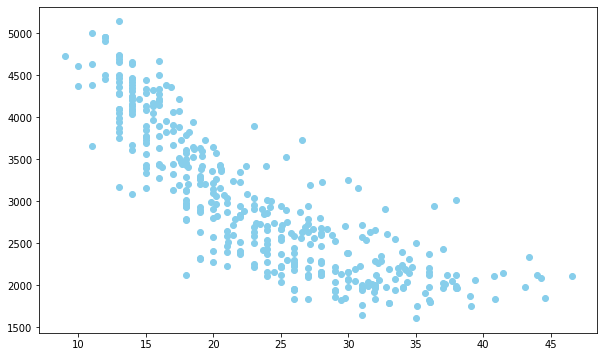

In [26]:
# scatter plot
df_auto = pd.read_excel('../pandas/dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')

In [23]:
df_auto[['mpg','weight','displacement','cylinders']].corr()

,mpg,weight,displacement,cylinders
mpg,1.000000,-0.831741,-0.804203,-0.775396
weight,-0.831741,1.000000,0.932824,0.896017
displacement,-0.804203,0.932824,1.000000,0.950721
cylinders,-0.775396,0.896017,0.950721,1.000000


(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

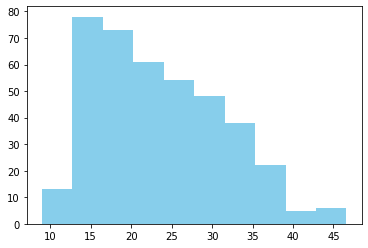

In [27]:
# histogram
plt.hist(x, bins=10, color='skyblue')

<AxesSubplot:>

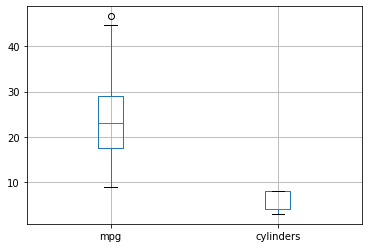

In [28]:
# box plot
df_auto.boxplot(column=['mpg','cylinders'])

In [66]:
# seaborn 내장 테마 : darkgrid, whitegrid, dark, white, ticks
sns.set_style('whitegrid')

In [33]:
import seaborn as sns

tips = pd.read_csv('dataset/tips.csv')
print(tips.head(),'\n')

party_counts = pd.crosstab(tips['day'], tips['size'])
print(party_counts.head(),'\n')

party_counts = party_counts.loc[:,2:5]
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4 

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3 



size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [35]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

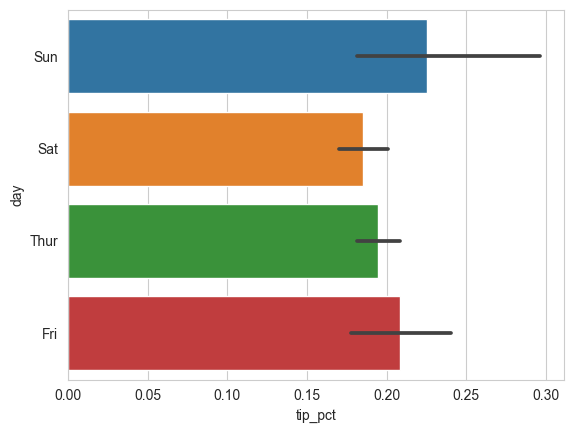

In [67]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

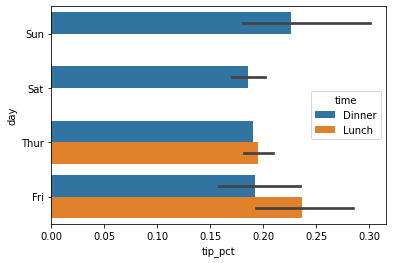

In [37]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

<AxesSubplot:xlabel='size', ylabel='count'>

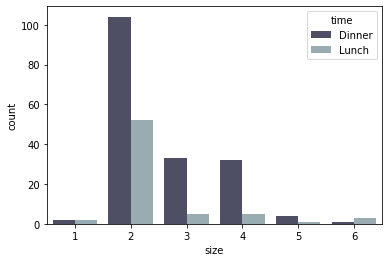

In [39]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot('size', hue='time', data=tips, palette='bone')

<AxesSubplot:xlabel='length', ylabel='Density'>

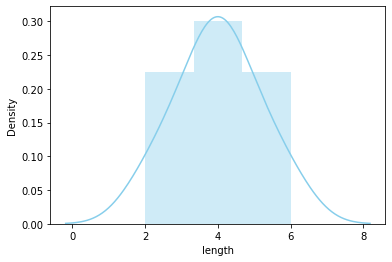

In [40]:
fish_multi = pd.read_csv('dataset/4_fm2.csv')
# 종류별 몸길이 데이터 추출
length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species == "B"')['length']

sns.distplot(length_a, color='skyblue')

<AxesSubplot:xlabel='length', ylabel='Density'>

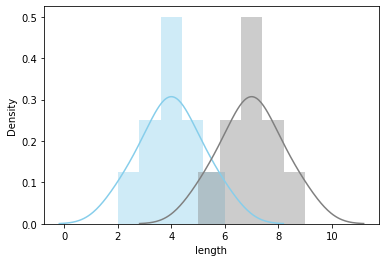

In [43]:
sns.distplot(length_a, bins=5, color='skyblue') # kernel density estimation
sns.distplot(length_b, bins=5, color='gray')

<AxesSubplot:xlabel='species', ylabel='length'>

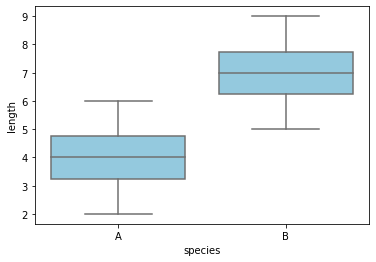

In [45]:
sns.boxplot(x='species', y='length', data= fish_multi, color='skyblue')

<AxesSubplot:xlabel='species', ylabel='length'>

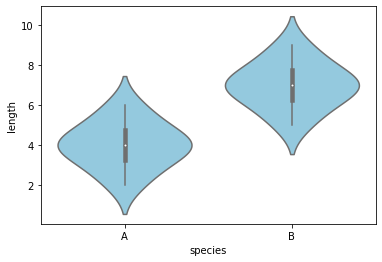

In [46]:
# 바이올린 플롯
# 상자 대신 히스토그램을 세로로 세워서 배치한 상자 그림. 어느 부분에 데이터가 집중되어 있는지 정보 추가
sns.violinplot(x='species', y='length', data=fish_multi, color='skyblue')

In [47]:
cov_data = pd.read_csv('dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


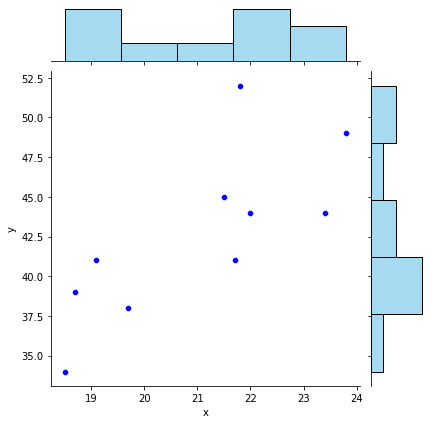

In [50]:
sns.jointplot(cov_data.x, cov_data.y,
             joint_kws = {'color':'blue'},
             marginal_kws = {"color":"skyblue"})

In [51]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


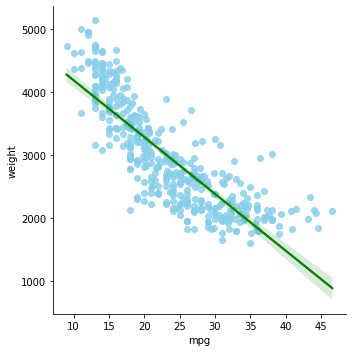

In [52]:
sns.lmplot(x='mpg',y='weight', data=df_auto, scatter_kws={'color':'skyblue'}, line_kws={'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

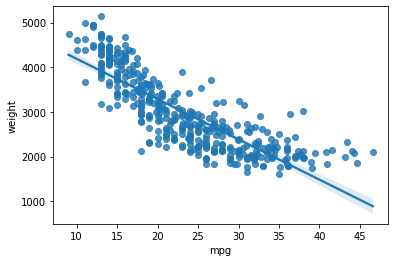

In [53]:
sns.regplot(x='mpg', y='weight', data=df_auto, fit_reg=True)

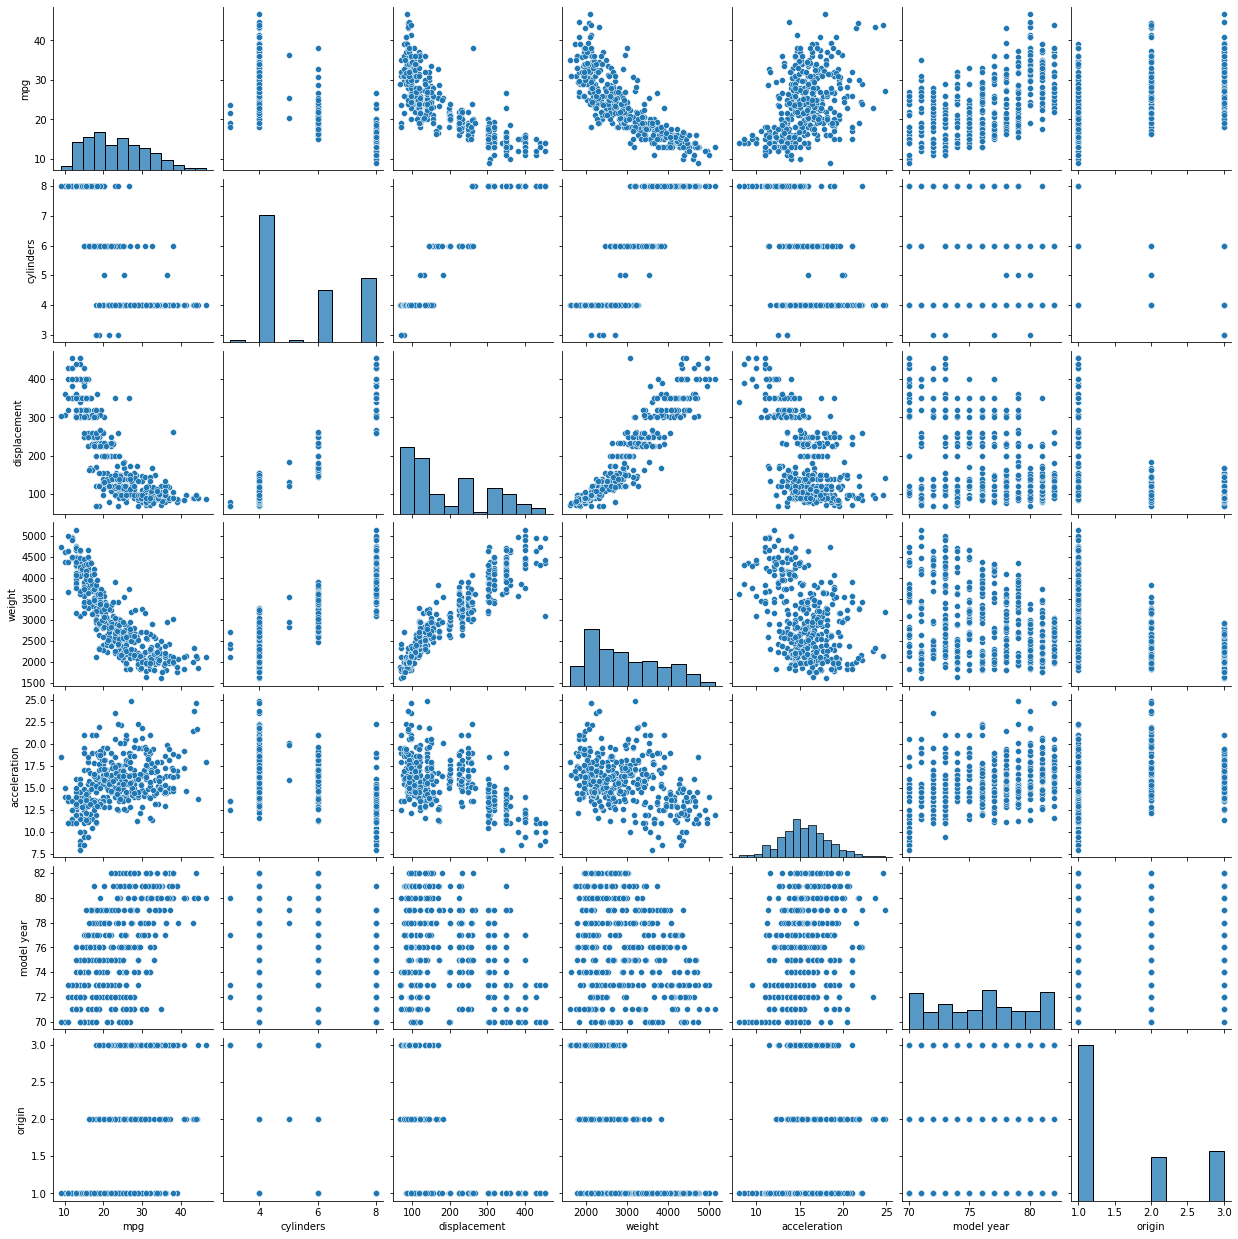

In [54]:
sns.pairplot(df_auto,palette='gray')

Text(0.5, 1.0, 'Heatmap of the Dataset')

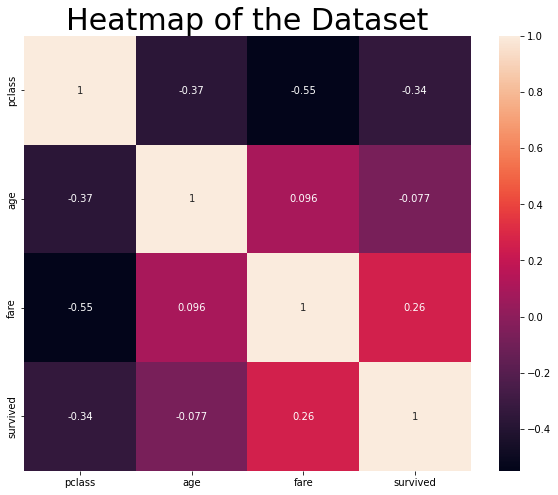

In [56]:
t_df = sns.load_dataset('titanic')
plt.figure(figsize=(10,8))
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(), annot=True)
plt.title('Heatmap of the Dataset', fontsize=30)

In [57]:
table = t_df.pivot_table(index=['sex'], columns=['class'], values=['survived'], aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

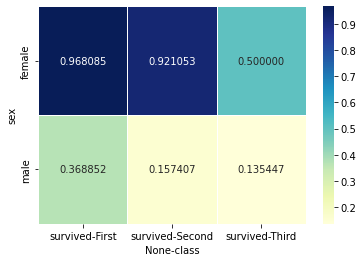

In [58]:
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu',
           linewidth = .5,
           cbar=True)